In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
#  loading nbaPlayersAllTimesAgilityData.csv
df = pd.read_csv('nbaPlayersAllTimesStatsData.csv')

#  remove ' ' from column names /!\ invisible characters
df.columns = df.columns.str.replace(' ', ' ')

# remove space in playerName
df['PLAYER'] = df['PLAYER'].str.replace(' ', '')

# remove duplicates
df = df.drop_duplicates(subset=['PLAYER'], keep='first')

# replace every value equal to '-' with the mean of the other value in the columns
df = df.replace('-', np.nan)
df = df.apply(pd.to_numeric, errors='ignore')
df = df.fillna(df.mean(numeric_only=True))

# getting the correlation
df1 = df[['#', 'MIN', 'FG%', 'PTS']]
df1 = df1.corr()




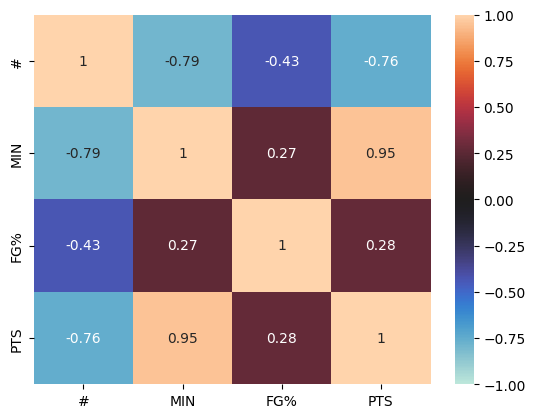

In [12]:
# plot correlation
sns.heatmap(df1, annot=True, vmin=-1, vmax=1, center=0)
plt.show()


As the above correlation shows, the best player does not necesarrily have a good Field Goal Percentage.